In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, chi2
from sklearn.ensemble import RandomForestClassifier

## Отбор параметров (дисперсионный анализ)

### Отбор параметров в процентах

In [21]:
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

In [23]:
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


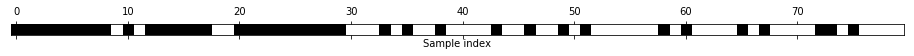

In [24]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index");
plt.yticks(());

### Отбор параметров в штуках

In [25]:
select = SelectKBest(k=20)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 20)


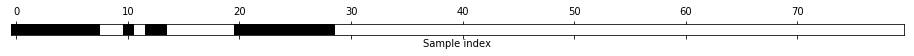

In [26]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index");
plt.yticks(());

## Отбор параметров из модели

In [27]:
select_m = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select_m.fit(X_train, y_train)
X_train_l1 = select_m.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


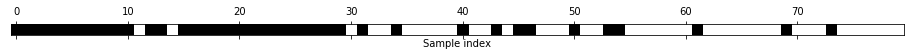

In [28]:
mask = select_m.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r');
plt.xlabel("Sample index");
plt.yticks(());

## Интерактивный отбор параметров (RFE)

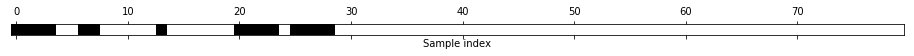

In [29]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=15)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r');
plt.xlabel("Sample index");
plt.yticks(());

In [30]:
mask

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

## Экспертное мнение

In [31]:
bike = pd.read_csv('citibike.csv')
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,3117,8/1/2015 01:19:15,8/1/2015 02:11:12,301,E 2 St & Avenue B,40.722174,-73.983688,301,E 2 St & Avenue B,40.722174,-73.983688,18070,Subscriber,1986.0,1
1,690,8/1/2015 01:27:30,8/1/2015 01:39:00,301,E 2 St & Avenue B,40.722174,-73.983688,349,Rivington St & Ridge St,40.718502,-73.983299,19699,Subscriber,1985.0,1
2,727,8/1/2015 01:38:49,8/1/2015 01:50:57,301,E 2 St & Avenue B,40.722174,-73.983688,2010,Grand St & Greene St,40.721655,-74.002347,20953,Subscriber,1982.0,1
3,698,8/1/2015 06:06:41,8/1/2015 06:18:20,301,E 2 St & Avenue B,40.722174,-73.983688,527,E 33 St & 2 Ave,40.744023,-73.976056,23566,Subscriber,1976.0,1
4,351,8/1/2015 06:24:29,8/1/2015 06:30:21,301,E 2 St & Avenue B,40.722174,-73.983688,250,Lafayette St & Jersey St,40.724561,-73.995653,17545,Subscriber,1959.0,1


In [32]:
bike['one'] = 1
bike['starttime']=pd.to_datetime(bike['starttime'])
citibike=bike[['starttime','one']].set_index('starttime').resample("3h").sum().fillna(0)
citibike.head()

,one
starttime,
2015-08-01 00:00:00,3
2015-08-01 03:00:00,0
2015-08-01 06:00:00,9
2015-08-01 09:00:00,41
2015-08-01 12:00:00,39


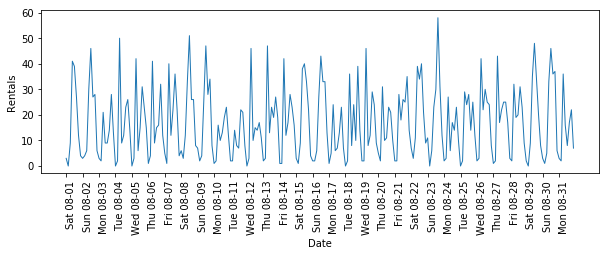

In [33]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1);
plt.xlabel("Date");
plt.ylabel("Rentals");

In [34]:
y = citibike.values.ravel()
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [35]:
# use the first 184 data points for training, the rest for testing
n_train = 184
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


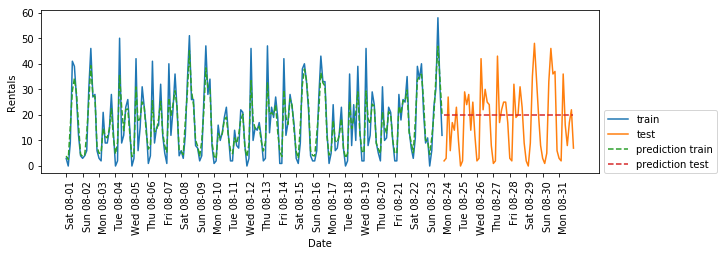

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


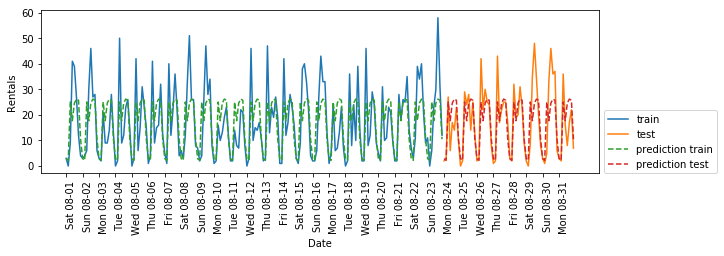

In [37]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

In [44]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])

In [45]:
X_hour_week[5:10]

array([[ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3]])

In [46]:
citibike.index.dayofweek

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
            ...
            6, 6, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='starttime', length=248)

Test-set R^2: 0.84


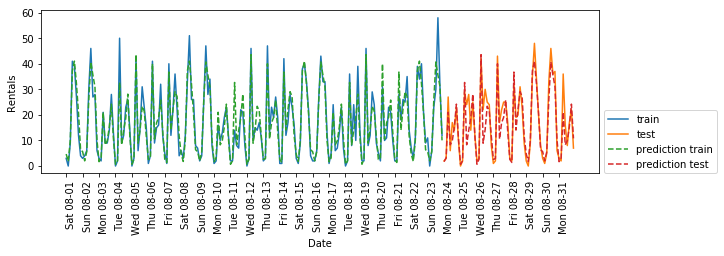

In [47]:
eval_on_features(X_hour_week, y, regressor)